In [1]:
import pandas as pd   #importing the libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#importing the csv file from the cloud 
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_5b48147b09f9498fa7c48f12d5e3066e = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Jffyyy6UIUzg3ApfD69Ym3LPtgtKQfdK0j5yVotMRRVt',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_5b48147b09f9498fa7c48f12d5e3066e.get_object(Bucket='rainfall-donotdelete-pr-wqs81g43z6mcgd',Key='raainfal.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

ds = pd.read_csv(body)
ds.head()



,year,month,day,tempavg,DPavg,humidity avg,SLPavg,visibilityavg,windavg,Rainfall
0,2011,2,13,21,13,60,1009,3,5,0.0
1,2011,2,14,21,18,75,1009,3,5,0.0
2,2011,2,15,22,18,75,1010,3,10,0.0
3,2011,2,16,23,21,86,1011,3,8,0.0
4,2011,2,17,23,19,75,1011,3,8,0.0


In [3]:
ds.head() #The first five values

,year,month,day,tempavg,DPavg,humidity avg,SLPavg,visibilityavg,windavg,Rainfall
0,2011,2,13,21,13,60,1009,3,5,0.0
1,2011,2,14,21,18,75,1009,3,5,0.0
2,2011,2,15,22,18,75,1010,3,10,0.0
3,2011,2,16,23,21,86,1011,3,8,0.0
4,2011,2,17,23,19,75,1011,3,8,0.0


In [4]:
ds.isnull().sum() #checking wheather there is a null value

year             0
month            0
day              0
tempavg          0
DPavg            0
humidity avg     0
SLPavg           0
visibilityavg    0
windavg          0
Rainfall         0
dtype: int64

In [5]:
x=ds.iloc[:,:9].values  #diving the independent and dependent variables
y=ds.iloc[:,9].values

In [6]:
from sklearn.model_selection import train_test_split  #splitting into the train and test values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20,random_state=0)

In [7]:
x_train #checking xtrain values

array([[2015,    6,    8, ..., 1004,    6,   14],
       [2015,    4,   21, ..., 1008,    6,   13],
       [2017,    2,   23, ..., 1012,    4,   14],
       ..., 
       [2013,    8,   16, ..., 1003,    5,   10],
       [2013,   10,   27, ..., 1007,    5,   11],
       [2016,    1,   23, ..., 1017,    2,   13]])

In [8]:
from sklearn.ensemble import RandomForestRegressor   #fitting the RandomForest Regressor to the train values
regressor= RandomForestRegressor(n_estimators=100, random_state = 0)
regressor.fit(x_train, y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [9]:
ypred =regressor.predict(x_test) #predicting the xtest values

In [10]:
ypred #checking predicted values

array([  2.07510000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   1.02000000e-02,   0.00000000e+00,
         0.00000000e+00,   1.09200000e-01,   8.98630000e+00,
         1.39710000e+00,   2.78550000e+00,   6.39640000e+00,
         4.06400000e-01,   0.00000000e+00,   1.71040000e+01,
         1.36920000e+00,   2.01640000e+00,   4.80100000e-01,
         8.91800000e-01,   6.75500000e-01,   5.97000000e-01,
         4.75909000e+01,   7.48100000e+00,   1.51941000e+01,
         2.27230000e+00,   2.84500000e-01,   0.00000000e+00,
         0.00000000e+00,   1.62320000e+00,   0.00000000e+00,
         1.37170000e+00,   1.49700000e-01,   0.00000000e+00,
         9.45000000e-01,   4.39390000e+00,   0.00000000e+00,
         2.56850000e+00,   0.00000000e+00,   5.36250000e+00,
         0.00000000e+00,   4.07660000e+00,   0.00000000e+00,
         2.04000000e-02,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   6.83000000e-02,   4.07000000e-02,
         7.71850000e+00,

In [11]:
y_test.shape #checking the shape of ytest


(473,)

In [12]:
ypred1=regressor.predict([[2011,5,20,29,25,75,1002,6,14]]) #predicting with the sample values

In [14]:
ypred1  #the values of predicted

array([ 0.3862])

In [15]:
from sklearn.metrics import r2_score # testing the  accuracy the r2 value
r2_score(y_test,ypred)


0.29854135060672882

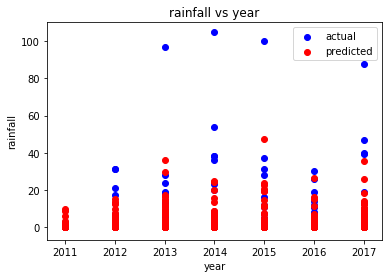

In [16]:
plt.scatter(x_test[:,0],y_test,color='blue',label='actual') #visualization of the algorithm
plt.xlabel('year')
plt.ylabel('rainfall')
plt.title('rainfall vs year')
plt.scatter(x_test[:,0],ypred,color='red',label='predicted')
plt.legend()

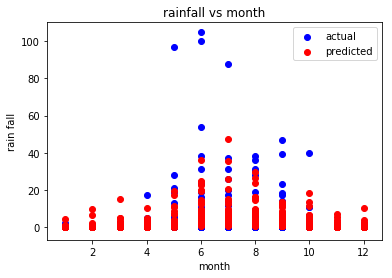

In [17]:
plt.scatter(x_test[:,1],y_test,color='blue',label='actual')
plt.xlabel('month')
plt.ylabel('rain fall')
plt.title('rainfall vs month')
plt.scatter(x_test[:,1],ypred,color='red',label='predicted')
plt.legend()

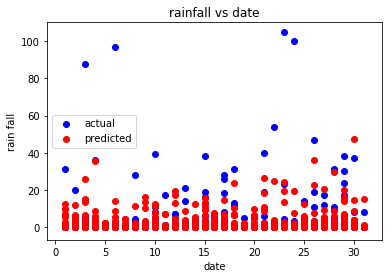

In [18]:
plt.scatter(x_test[:,2],y_test,color='blue',label='actual')
plt.xlabel('date')
plt.ylabel('rain fall')
plt.title('rainfall vs date')
plt.scatter(x_test[:,2],ypred,color='red',label='predicted')
plt.legend()

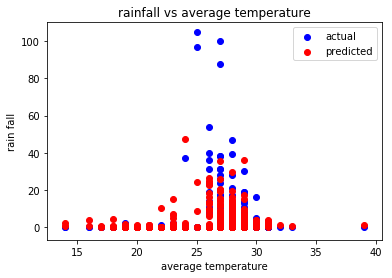

In [19]:
plt.scatter(x_test[:,3],y_test,color='blue',label='actual')
plt.xlabel('average temperature')
plt.ylabel('rain fall')
plt.title('rainfall vs average temperature')
plt.scatter(x_test[:,3],ypred,color='red',label='predicted')
plt.legend()

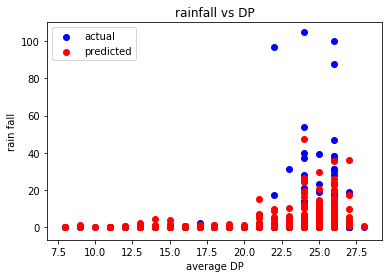

In [20]:
plt.scatter(x_test[:,4],y_test,color='blue',label='actual')
plt.xlabel('average DP')
plt.ylabel('rain fall')
plt.title('rainfall vs DP')
plt.scatter(x_test[:,4],ypred,color='red',label='predicted')
plt.legend()

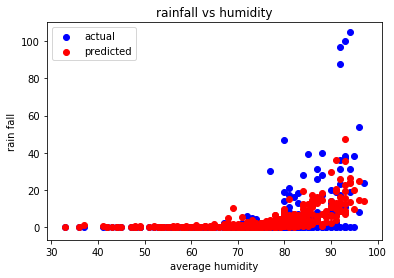

In [21]:
plt.scatter(x_test[:,5],y_test,color='blue',label='actual')
plt.xlabel('average humidity')
plt.ylabel('rain fall')
plt.title('rainfall vs humidity')
plt.scatter(x_test[:,5],ypred,color='red',label='predicted')
plt.legend()

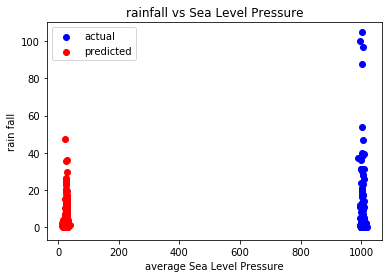

In [22]:
plt.scatter(x_test[:,6],y_test,color='blue',label='actual')
plt.xlabel('average Sea Level Pressure')
plt.ylabel('rain fall')
plt.title('rainfall vs Sea Level Pressure')
plt.scatter(x_test[:,3],ypred,color='red',label='predicted')
plt.legend()

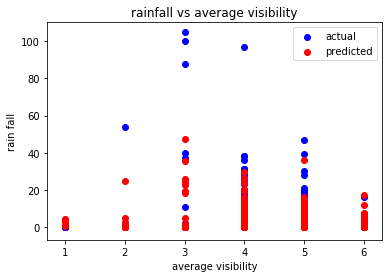

In [23]:
plt.scatter(x_test[:,7],y_test,color='blue',label='actual')
plt.xlabel('average visibility')
plt.ylabel('rain fall')
plt.title('rainfall vs average visibility')
plt.scatter(x_test[:,7],ypred,color='red',label='predicted')
plt.legend()

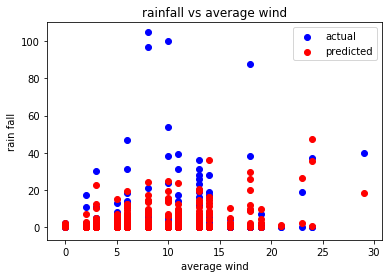

In [24]:
plt.scatter(x_test[:,8],y_test,color='blue',label='actual')
plt.xlabel('average wind')
plt.ylabel('rain fall')
plt.title('rainfall vs average wind')
plt.scatter(x_test[:,8],ypred,color='red',label='predicted')
plt.legend()

In [25]:
ds.corr()

,year,month,day,tempavg,DPavg,humidity avg,SLPavg,visibilityavg,windavg,Rainfall
year,1.000000,0.038898,-0.004969,0.090248,0.044044,-0.091357,0.085676,-0.082626,0.110007,0.041735
month,0.038898,1.000000,0.013457,0.116979,0.239600,0.318244,-0.102448,0.100189,-0.219532,0.034934
day,-0.004969,0.013457,1.000000,-0.028085,-0.007882,0.021505,0.007108,-0.044876,0.015099,0.005593
tempavg,0.090248,0.116979,-0.028085,1.000000,0.863829,0.340977,-0.674395,0.704721,0.233133,0.070369
DPavg,0.044044,0.239600,-0.007882,0.863829,1.000000,0.731021,-0.758224,0.604098,0.213889,0.177919
humidity avg,-0.091357,0.318244,0.021505,0.340977,0.731021,1.000000,-0.574413,0.173502,0.101864,0.297830
SLPavg,0.085676,-0.102448,0.007108,-0.674395,-0.758224,-0.574413,1.000000,-0.557946,-0.378632,-0.242161
visibilityavg,-0.082626,0.100189,-0.044876,0.704721,0.604098,0.173502,-0.557946,1.000000,0.244426,-0.022533
windavg,0.110007,-0.219532,0.015099,0.233133,0.213889,0.101864,-0.378632,0.244426,1.000000,0.164852
Rainfall,0.041735,0.034934,0.005593,0.070369,0.177919,0.297830,-0.242161,-0.022533,0.164852,1.000000


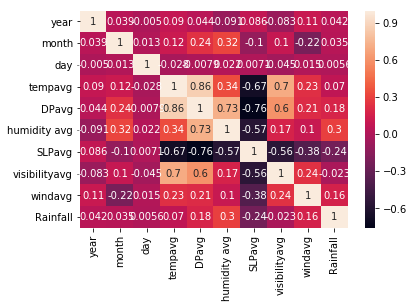

In [26]:
import seaborn as sns
sns.heatmap(ds.corr(),annot=True)

In [27]:
import pickle
s = pickle.dumps(regressor)

In [28]:
from sklearn.externals import joblib
joblib.dump(regressor, 'filename.pkl')


['filename.pkl']

In [29]:
get_ipython().system(u'pip install watson-machine-learning-client --upgrade')


Requirement already up-to-date: watson-machine-learning-client in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (1.0.365)
Requirement not upgraded as not directly required: ibm-cos-sdk in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from watson-machine-learning-client) (2.0.1)
Requirement not upgraded as not directly required: certifi in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from watson-machine-learning-client) (2019.3.9)
Requirement not upgraded as not directly required: urllib3 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from watson-machine-learning-client) (1.22)
Requirement not upgraded as not directly required: requests in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from watson-machine-learning-client) (2.18.4)
Requirement not upgraded as not directly required: pandas in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from watson-machine-learning-client) (0.21.0)
Requirement not upgraded as not di

In [30]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
2019-06-20 18:35:30,236 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.


In [31]:
wml_credentials={
  "url": "https://eu-gb.ml.cloud.ibm.com",
  "access_key": "b05P29xHFXmKdxMCV-DlRIAvNu08hr9amhyLL_h3ABTh",
  "username": "3dab30e9-9166-4158-8f0f-7d7a620815a1",
  "password": "69c68a45-147c-4461-bcef-4ddde06a0691",
  "instance_id": "397e2ade-47a0-4f16-ac0d-fd7a6cfbceb1"
}

In [32]:
client = WatsonMachineLearningAPIClient(wml_credentials)


In [33]:
instance_details = client.service_instance.get_details()

In [34]:
model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "nikhil,anish,santhosh,girish", 
               client.repository.ModelMetaNames.AUTHOR_EMAIL: "girish@ibm.com", 
               client.repository.ModelMetaNames.NAME: "rainfall"}



In [35]:
model_artifact =client.repository.store_model(regressor, meta_props=model_props)


In [36]:
published_model_uid = client.repository.get_model_uid(model_artifact)

In [37]:
model_details = client.repository.get_details(published_model_uid)


In [38]:
client.repository.list_models()


------------------------------------  --------  ------------------------  -----------------
GUID                                  NAME      CREATED                   FRAMEWORK
454b5d08-fa97-43c0-9907-074a7384ea37  rainfall  2019-06-20T18:35:30.437Z  scikit-learn-0.19
996de7f0-b8ac-47c5-9baf-3d806223adb3  rainfall  2019-06-20T16:38:56.283Z  scikit-learn-0.19
5f311d2a-f565-4454-8deb-ce433280ba41  rainfall  2019-06-19T16:48:41.801Z  scikit-learn-0.19
afcdda57-f797-482b-ba13-4133411bfef8  ml        2019-06-18T06:39:42.296Z  scikit-learn-0.19
------------------------------------  --------  ------------------------  -----------------


In [39]:
loaded_model = client.repository.load(published_model_uid)


In [40]:
created_deployment = client.deployments.create(published_model_uid, name="rainfall")




#######################################################################################

Synchronous deployment creation for uid: '454b5d08-fa97-43c0-9907-074a7384ea37' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='420cce9b-216b-4d87-92fb-91a69f5e243e'
------------------------------------------------------------------------------------------------




In [41]:
scoring_endpoint = client.deployments.get_scoring_url(created_deployment)

In [42]:
scoring_endpoint

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/397e2ade-47a0-4f16-ac0d-fd7a6cfbceb1/deployments/420cce9b-216b-4d87-92fb-91a69f5e243e/online'

In [43]:
client.deployments.list()

------------------------------------  --------  ------  --------------  ------------------------  -----------------  -------------
GUID                                  NAME      TYPE    STATE           CREATED                   FRAMEWORK          ARTIFACT TYPE
420cce9b-216b-4d87-92fb-91a69f5e243e  rainfall  online  DEPLOY_SUCCESS  2019-06-20T18:35:46.292Z  scikit-learn-0.19  model
d787cd07-49a0-492d-882b-144c4056aa4d  rainfall  online  DEPLOY_SUCCESS  2019-06-20T16:39:24.418Z  scikit-learn-0.19  model
6ca1145c-4378-46ca-8e16-6c57f8ceb75d  rainfall  online  DEPLOY_SUCCESS  2019-06-19T16:52:12.055Z  scikit-learn-0.19  model
adbdaf2b-38ea-4f2f-9267-440f9d49ed80  ml        online  DEPLOY_SUCCESS  2019-06-18T07:00:45.512Z  scikit-learn-0.19  model
------------------------------------  --------  ------  --------------  ------------------------  -----------------  -------------


In [44]:
scoring_payload = {"fields": ["Year","month","day","tempavg","DPavg","humidity avg","SLPavg","visibilityavg","windavg"],"values": [[2011,5,20,29,25,75,1002,6,14]]}


In [45]:
predictions = client.deployments.score(scoring_endpoint, scoring_payload)



In [46]:
predictions

{'fields': ['prediction'], 'values': [[0.3862000000000001]]}